# **Veri Bilimi İçin İstatistik**
## Örnek Teorisi!

Varsayalım ki bir ilçedeki kişilerin yaşlarına ilişkin bir çıkarımda bulunmak istiyoruz.  
Bu ilçedeki kişilerin yaş ortalamasını merak ediyoruz.  
Ama bu ilçede 10.000 kişi yaşıyor ve her birisiyle tek tek görüşmek çok da mümkün değil.  
Bu sebeple 10.000 kişinin hepsiyle görüşmek yerine bunun içerisinden 100 kişilik  
bir örneklem çekip, bu 100 kişinin yaş ortalamasını inceleyip, bu ilçenin yaş ortalamasının  
kaç olabileceğini tahmin etmek istiyoruz.

In [1]:
import numpy as np

In [3]:
populasyon = np.random.randint(0, 80, 10000)
#0-80 yas araliginda 10.000 kisi

In [4]:
populasyon[:10] # ilk 10 kisinin yasi

array([62, 58, 55, 79, 14, 32, 55, 47, 75, 18])

#### Örneklem Çekimi

Öncelikle **seed** ayarı yapmamız lazım.  
**seed** ayarı ne demek?  
Yapılacak olan işlemlerin her tekrar edildiğinde aynı sonuçların getirilmesini  
garanti altına alan bir işlem.  
random.seed()'i eklemezsek, fonksiyonu her çalıştırdığımda farklı örneklemler çekmiş olacak.

In [5]:
np.random.seed(115) #herhangi bir sayi verebilirsiniz.

orneklem = np.random.choice(a = populasyon, size=100)
#populasyon icerisinden 100 tane ornek cekme islemi.

orneklem

array([36, 40, 46, 48, 64,  2, 22, 30, 64, 50, 72, 15, 12, 56, 55, 13, 31,
       63, 67, 60, 10, 15, 21, 69, 56, 52, 23,  1,  0, 68, 19, 49, 33, 51,
       51, 78, 65, 39, 51, 58, 29, 74, 74,  0, 15, 33,  3, 47, 72, 70, 58,
       42, 79, 66, 10, 14, 27,  6, 60, 40, 34, 71, 24, 76, 73, 40, 74, 27,
       57, 72, 42, 47, 32, 71, 10, 43, 48,  1, 57, 79,  4, 55, 25, 35, 25,
        0, 73, 32, 45, 69, 14, 54, 36, 26, 42, 33, 16, 22, 60, 16])

Ana kitlemiz olan populasyon'da 10.000 gözlem vardı.  
Rastgele 100 gözlem çekerek örneklem oluşturduk.

In [6]:
orneklem.mean()

41.34

In [7]:
populasyon.mean()

39.6899

Örneklemin gücü burada çok açık bir şekilde dikkatimizi çekiyor.

#### Örneklem Dağılımı

In [8]:
np.random.seed(10)
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

Birbirinden farklı 10 tane örneklem çekmiş olduk.

Örneklemlerin ortalamalarının, ortalamasını alıyoruz.

In [9]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean() 
+ orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean() )  / 10

39.996

Normal şartlarda, daha fazla örneklem çekildiğinde, örneklemlerin ortalamasının ana kitle ortalamasına daha yakın olmasını bekleriz.

Merkezi limit teoremi aracılığı ile ana kitle ortalamasına gitmiş oluyoruz.

## Betimsel İstatistikler

Örneklerimizde Tips datasetini kullanacağız.

In [10]:
#tips datasetini kullanacagiz.
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
total_bill,16.99,10.34,21.01,23.68,24.59,25.29,8.77,26.88,15.04,14.78,...,15.53,10.07,12.6,32.83,35.83,29.03,27.18,22.67,17.82,18.78
tip,1.01,1.66,3.5,3.31,3.61,4.71,2.0,3.12,1.96,3.23,...,3.0,1.25,1.0,1.17,4.67,5.92,2.0,2.0,1.75,3.0
sex,Female,Male,Male,Male,Female,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Female,Male,Female,Male,Male,Female
smoker,No,No,No,No,No,No,No,No,No,No,...,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
day,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,...,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Thur
time,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,...,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner
size,2,3,3,2,4,4,2,4,2,2,...,2,2,2,2,3,3,2,2,2,2


In [13]:
#yeni bir kütüphane kullanacağız.
import researchpy as rp

Yukarıda yapmış olduğumuz işlemi bir de benzer şekilde _researchpy_ kütüphanesi ile yapalım.  
_summary_cont_ işlevi ile sayısal değişkenleri seçeceğiz.

In [14]:
rp.summary_cont(df[["total_bill", "tip", "size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


describe() ile benzer olsa da bizim için belki daha anlamlı olabilecek bazı değerler verdi.  
**N**: Gözlem sayıları  
**Mean**: Ortalama  
**SD**: Standart Sapma  
**95% Conf. Interval** Güven Aralıkları

Bir de bu işlemi categoric değişkenler için inceleyelim.

In [15]:
rp.summary_cat(df[["sex", "smoker", "day"]]).T

,0,1,2,3,4,5,6,7
Variable,sex,,smoker,,day,,,
Outcome,Male,Female,No,Yes,Sat,Sun,Thur,Fri
Count,157,87,151,93,87,76,62,19
Percent,64.34,35.66,61.89,38.11,35.66,31.15,25.41,7.79


Veri okuryazarlığından biraz daha farklı olarak betimsel istatistikleri farklı bir kütüphane ile ele almış olduk.  
Bu bölümün asıl farklılaştığı nokta olan **kovaryans** ve **korelasyon**'u da hızlıca bir ele alalım.

**Kovaryans**: Değişkenlerin ilişkilerine ilişkin bir değişkenlik ölçüsü.

**cov()** ile kovaryans hesaplaması yapabiliriz.

In [16]:
df[["tip", "total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


**Korelasyon**: İki değişken arasındaki ilişki hakkında bilgi verici ölçü.

**corr()** ile korelasyon hesaplaması yapabiliriz.

In [17]:
df[["tip", "total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


## İş Uygulaması: Fiyat Stratejisi Karar Destek Sistemi

Ürüne gelen fiyat teklifleri için veri toplandığını farzedelim.  
Şimdilik bu verileri kendimiz oluşturacağız.

In [18]:
import numpy as np
# 10 ve 110 TL araliginde 1000 adet teklif
fiyatlar = np.random.randint(10, 110, 1000)

In [19]:
fiyatlar.mean()
#Ortalama ödenmesi göze alınan miktar

58.492

In [20]:
#pip install git+https://github.com/statsmodels/statsmodels
#pip install statsmodels  
#conda install -c conda-forge statsmodels

Bunun etrafına bir güven aralığı koyarak çok daha zengin bir karar mekanizması oluşturmuş olacağız.  
Şimdi bunun için yeni bir kütüphane import edeceğiz.

In [21]:
import statsmodels.stats.api as sms

In [22]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(56.67953887736034, 60.30446112263965)

Müşterilerin %95'i 57-61 TL aralığında bedel ödemeyi göze almıştır.

# Olasılık Dağılımları

In [23]:
## Bernoulli Dağılımı

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

Olasılık dağılımları ile ilgili işlemler için _scipy_ ismi verilen kütüphaneyi kullanıyoruz.

In [24]:
from scipy.stats import bernoulli

In [25]:
#p -> 2 sonuçlu bir olayı ifade ediyor. (Yazı Tura gibi)
p = 0.6 #Tura gelme olasılığı

In [26]:
rv = bernoulli(p)

In [27]:
rv.pmf(k = 1) #pmf -> probability mass function(olasılık kütle fonksiyonu)
# k = 1 -> Tura gelme olasılığını hesaplar

0.6

In [28]:
rv.pmf(k = 0) #yazı gelme olasılığını hesaplar

0.4

## Büyük Sayılar Yasası

Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.

Düşünelim ki bir para atıyoruz, yazı yada tura gelme olasılığı %50'dir.  
Ancak 5 kez para attığımızı düşünelim 4 kez yazı 1 kez tura geldi.  
Tura gelme olasılığı %20 çıktı.

Biz bu deneyi sürekli atış sayısını arttırarak yapsaydık görmüş olacaktık ki,  
atış sayısı arttıkça oranlar %50'ye daha da yaklaşacaktı.

Şimdi biz bu durumu kendi yazdığımız küçük bir döngü aracılığıyla gözlemlemiş olacağız.

In [29]:
import numpy as np
rng = np.random.RandomState(123) # Yapılacak işlemleri sabitlemek için random state kullandik.
for i in np.arange(1,21): #1-20 arasinda gez
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size=deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı:", deney_sayisi, "---", "Yazı Olasılığı: %.2f"%(yazi_olasiliklari*100))

Atış Sayısı: 2 --- Yazı Olasılığı: 50.00
Atış Sayısı: 4 --- Yazı Olasılığı: 0.00
Atış Sayısı: 8 --- Yazı Olasılığı: 62.50
Atış Sayısı: 16 --- Yazı Olasılığı: 43.75
Atış Sayısı: 32 --- Yazı Olasılığı: 46.88
Atış Sayısı: 64 --- Yazı Olasılığı: 56.25
Atış Sayısı: 128 --- Yazı Olasılığı: 50.78
Atış Sayısı: 256 --- Yazı Olasılığı: 52.73
Atış Sayısı: 512 --- Yazı Olasılığı: 52.93
Atış Sayısı: 1024 --- Yazı Olasılığı: 50.20
Atış Sayısı: 2048 --- Yazı Olasılığı: 48.58
Atış Sayısı: 4096 --- Yazı Olasılığı: 49.49
Atış Sayısı: 8192 --- Yazı Olasılığı: 49.58
Atış Sayısı: 16384 --- Yazı Olasılığı: 49.96
Atış Sayısı: 32768 --- Yazı Olasılığı: 50.00
Atış Sayısı: 65536 --- Yazı Olasılığı: 49.68
Atış Sayısı: 131072 --- Yazı Olasılığı: 49.97
Atış Sayısı: 262144 --- Yazı Olasılığı: 50.13
Atış Sayısı: 524288 --- Yazı Olasılığı: 50.01
Atış Sayısı: 1048576 --- Yazı Olasılığı: 50.09


## Binom Dağılımı

Binom dağılımı, bağımsız **n** deneme sonucu **k** başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır.

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

## İş Uygulaması: Reklam Harcaması Optimizasyonu

In [30]:
from scipy.stats import binom

In [31]:
p = 0.01 #bildiğimiz olasılık değerimiz
n = 100 #deneme sayısı
rv = binom(n, p)
print(rv.pmf(1)) #pmf=probability mass function. 1 kişinin tıklama olasılığı
print(rv.pmf(5)) # 5 kişinin tıklama olasılığı
print(rv.pmf(10)) # 10 kişinin tıklama olasılığı

0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


## Poison Dağılımı

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

### İş Uygulaması: İlan Girişi Hata Olasılıklarının Hesaplanması

<img src="https://i.ibb.co/SQYR7Dc/Screenshot-1.jpg" alt="Screenshot-1" border="0">

In [32]:
from scipy.stats import poisson

In [33]:
lambda_ = 0.1 #ortalama hata sayısı

In [34]:
rv = poisson(mu = lambda_) #poisson fonksiyonunda mu parametresine lambda değerini veriyoruz.

print(rv.pmf(k = 0)) #hiç hata olmaması olasılığı
print(rv.pmf(k = 3)) #3 hata olması olasılığı
print(rv.pmf(k = 5)) #5 hata olması olasılığı

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


## Normal Dağılım

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

### İş Uygulaması: Ürün Satış Olasılıklarının Hesaplanması

In [35]:
from scipy.stats import norm

In [36]:
#90'dan fazla olması olasılığı
1-norm.cdf(90, 80, 5)
#cdf = kümülatif yoğunluk fonksiyonu
#cdf(hedef, ortalama, std)

0.02275013194817921

In [37]:
#70'den fazla olması olasılığı
1-norm.cdf(70,80,5)

0.9772498680518208

In [38]:
#73'den az olması
norm.cdf(73,80,5)

0.08075665923377107

In [39]:
#85 ile 90 arasında olması olasılığı
norm.cdf(90,80,5)-norm.cdf(85,80,5)

0.13590512198327787

# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


### İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

In [68]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [69]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [70]:
import scipy.stats as stats

In [71]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

### Varsayımlarımız
#### Normallik varsayımı

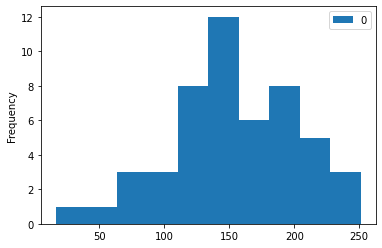

In [72]:
#histogram
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

**qqplot**

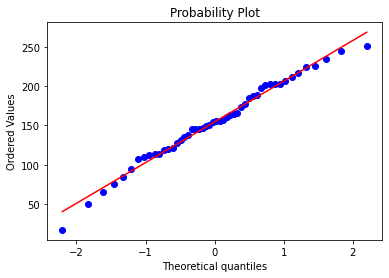

In [73]:
##qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

**Shapiro-Wilks Testi**

**H0:** Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.  
**H1:** Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.

In [74]:
from scipy.stats import shapiro

In [75]:
shapiro(olcumler)

(0.9853105545043945, 0.7848747968673706)

Sol tarafta görmüş olduğumuz değer test istatistiğini ifade ediyor,  
sağ tarafta görmüş olduğumuz değer ise p-value değerini ifade ediyor.

p-value değerimiz 0.05(alpha)'dan büyük olduğundan **H0** hipotezi reddedilemez.

In [76]:
print("T Hesap İstatistiği: "+str(shapiro(olcumler)[0]))
print("Hesaplanan p-value: "+str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan p-value: 0.7848747968673706


#### **Tek Örneklem T Testi Uygulaması**

In [77]:
#populasyon ortalamamiz gercekten 170 mi?
stats.ttest_1samp(olcumler, popmean=170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

**H0**: Web sitemizde geçirilen ortalama süre 170 saniyedir.  
**H1**: Web sitemizde geçirilen ortalama süre 170 saniye değildir.

**pvalue** değerimiz de 0.03 yani 0.05'den küçük olduğundan **H0** hipotezi reddedilir.  


### **Nonparametrik Tek Örneklem Testi**

In [78]:
from statsmodels.stats.descriptivestats import sign_test

In [79]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

### **Tek Örneklem Oran Testi**

Oransal bir ifade test edilmek istenildiğinde kullanılır.  


#### **İş Uygulaması: Dönüşüm Oranı Testi**

HO: p = 0.125 

H1: p != 0.125

In [80]:
from statsmodels.stats.proportion import proportions_ztest

In [81]:
count = 40 #başarı sayısı
nobs = 500 #gözlem sayısı
value = 0.125 #test etmek istediğimiz oran

In [82]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

Burada p-value değerimiz (0.0002) < 0.05 olduğundan H0 hipotezimizi reddediyoruz.  
%95 güven ile 0.125 değerinin yanlış olduğunu söyleyebiliriz.

## **Bağımsız İki Örneklem T Testi (AB Testi)**

#### **İş Uygulaması: ML Modelinin Başarı Testi**

H0: M1 = M2 

H1: M1 != M2

**Veri Tipi 1**

In [83]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A, B], axis=1)
A_B.columns = ["A", "B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


**Veri Tipi 2**

In [84]:
import numpy as np
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
Grup_A = np.arange(len(A))
Grup_A = pd.DataFrame(Grup_A)
Grup_A[:] = "A"
A = pd.concat([A, Grup_A], axis = 1)

#B ve B'nin grubu
Grup_B = np.arange(len(B))
Grup_B = pd.DataFrame(Grup_B)
Grup_B[:] = "B"
B = pd.concat([B, Grup_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir", "Grup"]
print(AB.head())
print(AB.tail())

   gelir Grup
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir Grup
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


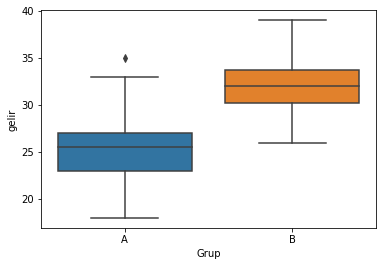

In [85]:
import seaborn as sns
sns.boxplot(x="Grup", y="gelir", data=AB)

#### **Varsayım Kontrolü**

In [58]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [59]:
AB.head()

,gelir,Grup
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


**Normallik Varsayımı**

In [60]:
from scipy.stats import shapiro

In [61]:
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

In [62]:
shapiro(A_B.B)

(0.9561261534690857, 0.2458445429801941)

**Varyans Homojenliği Varsayımı**

**H0:** Varyanslar Homojendir  
**H1:** Varyanslar Homojen Değildir

In [63]:
from scipy import stats
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

### **Bağımsız İki Örneklem T Testi Uygulama**

**Hipotez Testi**

In [64]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [65]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


## Nonparametrik Bağımsız İki Örneklem Testi

In [66]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [67]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


# Bağımlı İki Örneklem T Testi

**İş Uygulaması: Şirket İçi Eğitimin Performans Etkisi Ölçümü**

In [86]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [87]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [88]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [89]:
 np.arange(len(oncesi))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [90]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



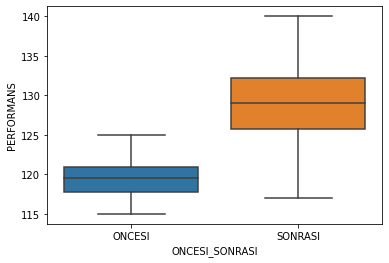

In [91]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

## Varsayım Kontrolleri 

In [92]:
from scipy.stats import shapiro

In [93]:
shapiro(AYRIK.ONCESI)

(0.9543654918670654, 0.10722342133522034)

In [94]:
shapiro(AYRIK.SONRASI)

(0.9780087471008301, 0.6159457564353943)

In [95]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

## Hipotez Testi

In [96]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [97]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


## Nonparametrik Bağımlı İki Örneklem Testi

In [98]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [99]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


## İki Örneklem Oran Testi

#### **İş Uygulaması: Kullanıcı Arayüz Deneyi (AB Testi)**

In [100]:
from statsmodels.stats.proportion import proportions_ztest

In [101]:
import numpy as np
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

In [102]:
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

# Varyans Analizi

H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

H1: Fark vardir.

#### **İş Uygulaması: Anasayfa İçerik Stratejisi Belirleme**

In [103]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


## Varsayım Kontrolü

In [104]:
from scipy.stats import shapiro

In [106]:
shapiro(ABC["GRUP_A"])

(0.9697431921958923, 0.5321715474128723)

In [107]:
shapiro(ABC["GRUP_B"])

(0.9789854884147644, 0.7979801297187805)

In [108]:
shapiro(ABC["GRUP_C"])

(0.9579201340675354, 0.273820161819458)

In [109]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

## Hipotez Testi

In [110]:
from scipy.stats import f_oneway

In [111]:
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [112]:
print('{:.5f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

0.00000


In [113]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


## Nonparametrik Hipotez Testi

In [114]:
from scipy.stats import kruskal

In [115]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

## Korelasyon Analizi

#### **İş Uygulaması: Bahşiş ile Ödenen Hesap Arasındaki İlişkinin İncelenmesi**

**Bahşiş veri seti:**

**total_bill:** yemeğin toplam fiyatı (bahşiş ve vergi dahil)

**tip:** bahşiş

**sex:** ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

**smoker:** grupta sigara içen var mı? (0=No, 1=Yes)

**day:** gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

**time:** ne zaman? (0=Day, 1=Night)

**size:** grupta kaç kişi var?

In [116]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [117]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [118]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


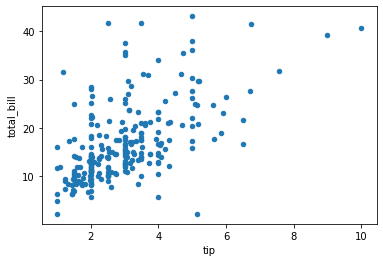

In [119]:
df.plot.scatter("tip","total_bill");

# Varsayım Kontrolü

In [120]:
from scipy.stats import shapiro

In [121]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


# Hipotez Testi

### Korelasyon Katsayısı

In [122]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [123]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

### Korelasyonun Anlamlılığının Testi

In [124]:
from scipy.stats.stats import pearsonr

In [125]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


## Nonparametrik Hipotez Testi

In [126]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [127]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [128]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
